# Assignment 2 - Homework 3 - PUI2015
---
### Arno Amabile - October 2, 2015

In [1]:
import numpy as np
import scipy.stats

import json
from IPython.display import Image

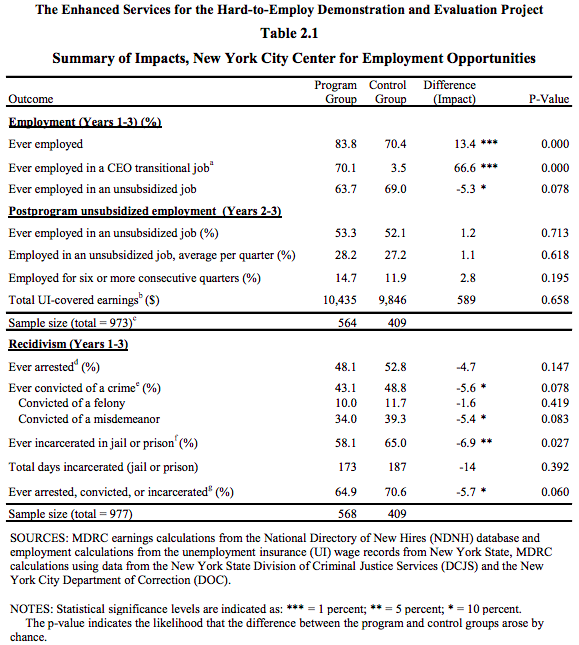

In [2]:
Image(filename='NYCReentryprogram.png')

### 1. Z-score hypothesis testing

**Null hypothesis**: The percentage of former prisoners *employed in an unsubsidized job* after release is the same or lower for candidates who participated in the program as for the control group, with a 5% significance level.

$H_0: P_0 - P_1 \geq 0$
    
$H_1: P_0 - P_1 < 0$    
    
$\alpha = 0.05$

In [3]:
alpha=0.05
P = [27.2*0.01, 28.2*0.01]

N = [409.0, 564.0]

In [4]:
# First, I define the sample proportion (the share of the prisoners that have been employed)
sp = (P[0]*N[0] + P[1]*N[1])/(N[0] + N[1])
print "Sample proportion = {0:.2f}%".format(sp*100)

# I define functions to compute the standard deviation and then the z-score
sp_std = lambda p,n: np.sqrt(p*(1-p)/n[0] + p*(1-p)/n[1])
zscore = lambda p0,p1, s: (p0-p1)/s

sp_std_5 = sp_std(P[0]+P[1], N)
z_5 = zscore(P[0],P[1], sp_std_5)

print "z-score = {0:.3f}".format(z_5)
print "P(Z < z) = {0:.2f}%".format(scipy.special.ndtr(z_5)*100), "\n" 

# With the z-score, the Z distribution, and my confidence level, I can test my hypothesis 
def report_result(p,a):
    print "Is the p value {0:.2f} smaller than the critical value {1:.2f}?".format(p,a)
    if p < a:
        print "Yes"
    else: print "No"
    
    print 'I {} the Null hypothesis at the 95% confidence level'.format( 'reject' if p < a  else 'fail to reject') 
    
report_result(1 - scipy.special.ndtr(z_5),alpha)

Sample proportion = 27.78%
z-score = -0.310
P(Z < z) = 37.84% 

Is the p value 0.62 smaller than the critical value 0.05?
No
I fail to reject the Null hypothesis at the 95% confidence level


### 2. Chi-square hypothesis testing

** Null hypothesis **: The percentage of prisoners employed for six or more consecutive quarters is the same or lower for candidates who participated in the program as for the control group, with a 5% significance level.

$H_0: P_0 \geq P_1$

$H_1: P_0 < P_1$

** Observed values **

|6+ consecutive quarters    |     Employed Ind.     | Not Employed       |                   
|---------------------------|-----------------------|--------------------|---------|
| Control sample            | $0.119 \times 409$    | $0.881 \times 409$ | 409     |
| Test sample               | $0.147 \times 564$    | $0.853 \times 564$ | 564     |
|                           |                       |                    |         |
| Total                     | 131.579               |  841.421           | 973     |

In order to compute the expected value, I:
    * Round up total numbers, as we are dealing with undivisible persons
    * Perform the following operation for each cell
$$
\text{Expected Employed in Test Sample} = \frac{132}{973} \times \frac{564}{973} \times 973 \approx 76 
$$

** Expected values (rounded up) **

|6+ consecutive quarters    |     Employed   | Not Employed     |                   
|---------------------------|----------------|------------------|---------|
| Control sample            | $55$           | $354$            | 409     |
| Test sample               | $76$           | $488$            | 564     |
|                           |                |                  |         |
| Total                     | 131            |      842         | 973     |

In [5]:
P = [11.9*0.01,14.7*0.01]
N_sp = [409,564]
N_tot = N_sp[0] + N_sp[1]

obs = [P[0]*N_sp[0],(1-P[0])*N_sp[0], P[1]*N_sp[1],(1-P[1])*N_sp[1]]
N_empl = [obs[0] + obs[2], obs[1] + obs[3]]

exp = [N_empl[0] * N_sp[0]/N_tot, N_empl[1] * N_sp[0]/N_tot, N_empl[0] * N_sp[1]/N_tot, N_empl[1] * N_sp[1]/N_tot]

chi2, p = scipy.stats.chisquare(obs, exp)

print "Chi-square statistic = {0:.2f}".format(chi2), "\n"

def report_result(p,a):
    print "Is the p value {0:.2f} smaller than the critical value {1:.2f}?".format(p,a)
    if p < a:
        print "Yes"
    else: print "No"
    
    print 'I {} the Null hypothesis'.format( 'reject' if p < a  else 'fail to reject') 
    
report_result(p,alpha)

Chi-square statistic = 1.59 

Is the p value 0.66 smaller than the critical value 0.05?
No
I fail to reject the Null hypothesis


### 3. Questions
    1. 432 is hella larger then 3.84. Why am i mentioning 3.84?

Because our confidence level is 95%, hence the threshold is above or below 0.05. A chi-square statistic above 3.84 inmplies a p-value below 0.05, hence an rejection of the null hypothesis at a 95% confidence level.

    2. How does the 6 months chi-square statistic that you derived compare?

My chi-square statistic is equal to 1.59, it is smaller than 3.84, thus I fail to reject the null hypothesis at a 95% confidence level. Being in the program is not associated with a higher probability of being employed 6 or more consecutive months.

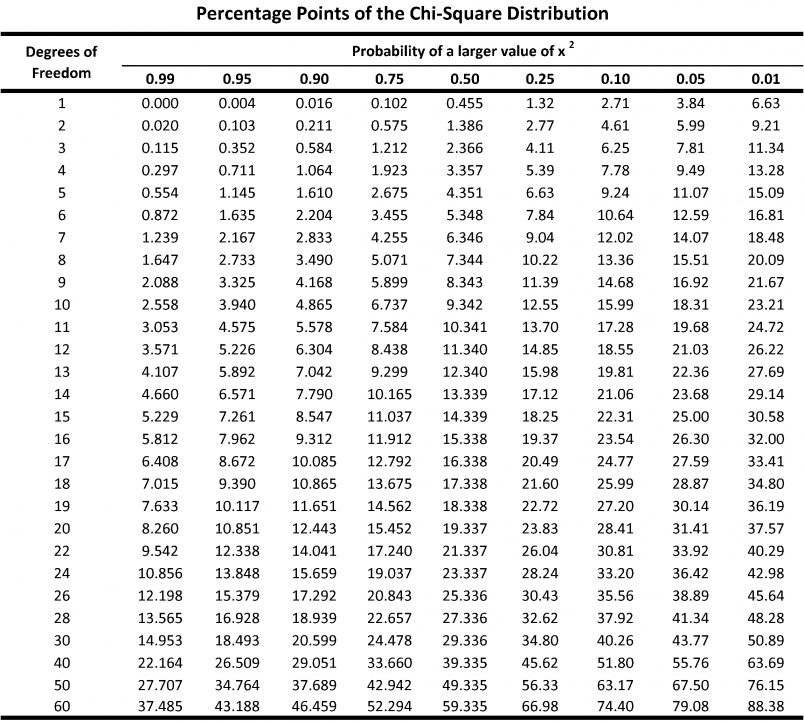

In [6]:
Image("http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG")